In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import lenstronomy.Util.util as util
from lenstronomy.SimulationAPI.sim_api import SimAPI
plt.style.use('dark_background')

In [2]:
DES_camera = {'read_noise': 7.,  # std of noise generated by read-out (in units of electrons)
               'pixel_scale': 0.2637,  # scale (in arcseconds) of pixels
               'ccd_gain': 6.  # electrons/ADU (analog-to-digital unit). A gain of 8 means that the camera digitizes the CCD signal so that each ADU corresponds to 8 photoelectrons.
              }

DES_g_band_obs = {'exposure_time': 90.,  # exposure time per image (in seconds)
                   'sky_brightness': 35.01,  # sky brightness (in magnitude per square arcseconds)
                   'magnitude_zero_point': 30,  # magnitude in which 1 count per second per arcsecond square is registered (in ADU's)
                   'num_exposures': 7,  # number of exposures that are combined
                   'seeing': 1.12,  # full width at half maximum of the PSF (if not specific psf_model is specified)
                   'psf_type': 'GAUSSIAN',  # string, type of PSF ('GAUSSIAN' and 'PIXEL' supported)
                   'kernel_point_source': None  # 2d numpy array, model of PSF centered with odd number of pixels per axis (optional when psf_type='PIXEL' is chosen)
                  }

numpix = 46 
kwargs_g_band = util.merge_dicts(DES_camera, DES_g_band_obs)
kwargs_numerics = {'point_source_supersampling_factor': 10}
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.)

In [3]:
def simulation(redshifts, lens):
   
    kwargs_model_physical = {'lens_model_list': ['SIE'],  # list of lens models to be used
                          'lens_redshift_list': [redshifts['lens']],  # list of redshift of the deflections
                          # list of extended source models to be used
                          'source_light_model_list': ['SERSIC_ELLIPSE'],  
                          # list of redshfits of the sources in same order as source_light_model_list
                          'source_redshift_list': [redshifts['source1']],  
                          'cosmo': cosmo,  # astropy.cosmology instance
                          # redshift of the default source (if not further specified by 'source_redshift_list')
                          'z_source': redshifts['source1']} 
                           #and also serves as the redshift of lensed point sources}
        
    sim_g = SimAPI(numpix=numpix, kwargs_single_band=kwargs_g_band, kwargs_model=kwargs_model_physical)
    
    kwargs_mass = [{'sigma_v': lens['sigma'], 'center_x': 0, 'center_y': 0, 'e1': lens['e1'], 'e2': lens['e2']}]
    kwargs_lens = sim_g.physical2lensing_conversion(kwargs_mass=kwargs_mass)
    
    return(kwargs_lens[0]['theta_E'])

In [4]:
lens = {'sigma': 300, 'e1': 0, 'e2': 0}
z1_list = np.linspace(0.3, 5., 400)
theta_E = []
for z in z1_list:
    redshifts = {'lens': 0.2, 'source1': z}
    theta_E.append(simulation(redshifts, lens))

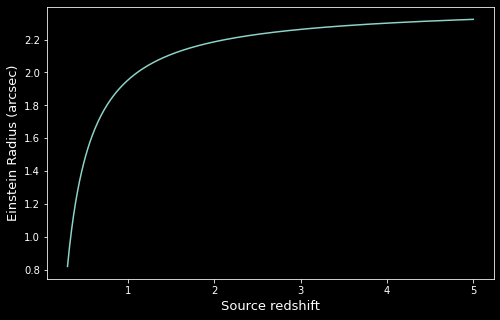

In [5]:
plt.figure(figsize=(8,5))
plt.xlabel('Source redshift', fontsize=13)
plt.ylabel('Einstein Radius (arcsec)', fontsize=13)
plt.plot(z1_list, theta_E)
plt.show()

In [6]:
lens = {'sigma': 300, 'e1': 0, 'e2': 0}
z_list = np.linspace(0., 4.9, 400)
theta_E = []
for z in z_list:
    redshifts = {'lens': z, 'source1': 5.}
    theta_E.append(simulation(redshifts, lens))

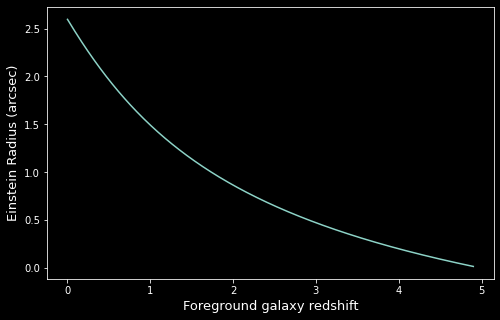

In [7]:
plt.figure(figsize=(8,5))
plt.xlabel('Foreground galaxy redshift', fontsize=13)
plt.ylabel('Einstein Radius (arcsec)', fontsize=13)
plt.plot(z_list, theta_E)
plt.show()

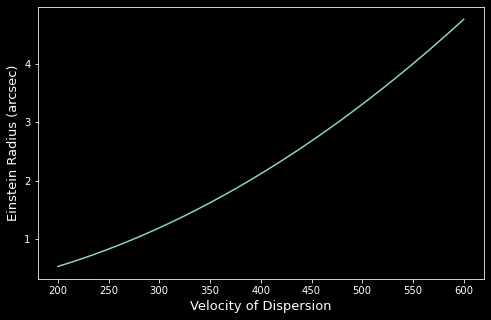

In [8]:
redshifts = {'lens': 0.3, 'source1': 0.6}
vel_disp = np.linspace(200., 600., 500)
theta_E = []
for v in vel_disp:
    lens = {'sigma': v, 'e1': 0, 'e2': 0}
    theta_E.append(simulation(redshifts, lens))
    
plt.figure(figsize=(8,5))
plt.xlabel('Velocity of Dispersion', fontsize=13)
plt.ylabel('Einstein Radius (arcsec)', fontsize=13)
plt.plot(vel_disp, theta_E)
plt.show()